# **Hackathon 2 Team 1 Project - Health Insurance Analysis**

# Section 2: Data Visualization

## Objectives

In Section 2, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made. There will be a summary of findings and conclusion in the Section 3.


## Inputs

* 2 cleaned datasets prepared in Section 1 will be used. 
 *  [Insurance_cleaned_orig.csv](../dataset/processed/Insurance_cleaned_orig.csv)   
 *  [Insurance_cleaned_transformed.csv](../dataset/processed/Insurance_cleaned_transfromed.csv)

## Business Requirements Recap

The business requires a predictive model to estimate insurance charges based on customer demographics (age, sex, region) and lifestyle factors (smoker). Since categorical variables cannot be directly used by most models, they must be transformed into numerical format using one-hot encoding. Additionally, visualizations of the encoded features are required to understand category distributions and their impact on charges, enabling data-driven decisions in pricing strategy, risk assessment, and market targeting.

* Customer Segmentation

    * Distribution plot shows how customers are spread across sex, smoker, region.

    * Helps insurers identify under/over-represented groups.

* Risk Assessment

    * Average charges per category plot shows which groups drive higher costs (e.g., smokers have higher charges).

    * Insurers can adjust premiums accordingly.

* Market Strategy

    * Regional distribution can reveal where most insured clients are located.

    * Helps allocate sales and marketing resources effectively.

* Fairness & Compliance

    * By examining how categorical groups differ in charges, insurers can ensure pricing models comply with regulations (avoid discrimination while adjusting for risk).

## Hypothesis

1. **Smoker Status:** We hypothesize that individuals who smoke will have significantly higher insurance charges compared to those who do not smoke. This will be tested as we keep other attributes constant while we compare relationship between smoker status and medical insurance cost.
    
2. **BMI:** We hypothesize that there is a positive correlation between an individual's Body Mass Index (BMI) and their insurance charges. This will be tested as we keep other attributes constant while we compare relationship between BMI and medical insurance cost.
   
3. **Age:** We hypothesize that older individuals will have higher average insurance charges than younger individuals. This will be tested as we keep other attributes constant while we compare relationship between Age and medical insurance cost.

4. **Region:** We hypothesize that geographic region will have less impact than personal attributes (Smoker status, BMI and Age) on medical insurance cost. This will be tested as we keep other attributes constant while we compare relationship between Age and medical insurance cost.

5. **Children:** We hypothesize that the number of children an individual has will have an impact on medical insurance cost but will be less than the impact of personal attributes (Smoker status, BMI and Age). This will be tested/validated as we keep other attributes constant while we compare relationship between number of children and medical insurance cost.


## Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook. All the result will be summarized in README.md below.
    * [README.md](../README.md)





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/Hackathon2Team1Project-Health-Insurance-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/Hackathon2Team1Project-Health-Insurance-Analysis'

---

# Part A

# Features Correlation Overview

In [4]:
import numpy as np
import pandas as pd


In [5]:
# Load datasets from csv files
df = pd.read_csv("dataset/processed/Insurance_cleaned_orig.csv")
df_encoded = pd.read_csv("dataset/processed/Insurance_cleaned_transformed.csv")

---

In [6]:
df.head()

,ID,age,sex,bmi,children,smoker,region,charges,bmi_category
0,1,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,2,18,male,33.770,1,no,southeast,1725.55230,obese
2,3,28,male,33.000,3,no,southeast,4449.46200,obese
3,4,33,male,22.705,0,no,northwest,21984.47061,normal
4,5,32,male,28.880,0,no,northwest,3866.85520,overweight


In [7]:
df_encoded.head()

,ID,age,bmi,children,charges,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal,log_charges
0,1,19,27.900,0,16884.92400,1,1,1,0,0,1,0,0,9.734176
1,2,18,33.770,1,1725.55230,0,0,0,1,0,0,1,0,7.453302
2,3,28,33.000,3,4449.46200,0,0,0,1,0,0,1,0,8.400538
3,4,33,22.705,0,21984.47061,0,0,0,0,1,0,0,1,9.998092
4,5,32,28.880,0,3866.85520,0,0,0,0,1,1,0,0,8.260197


**1. Heatmap for Overviewing the Features Correlation**

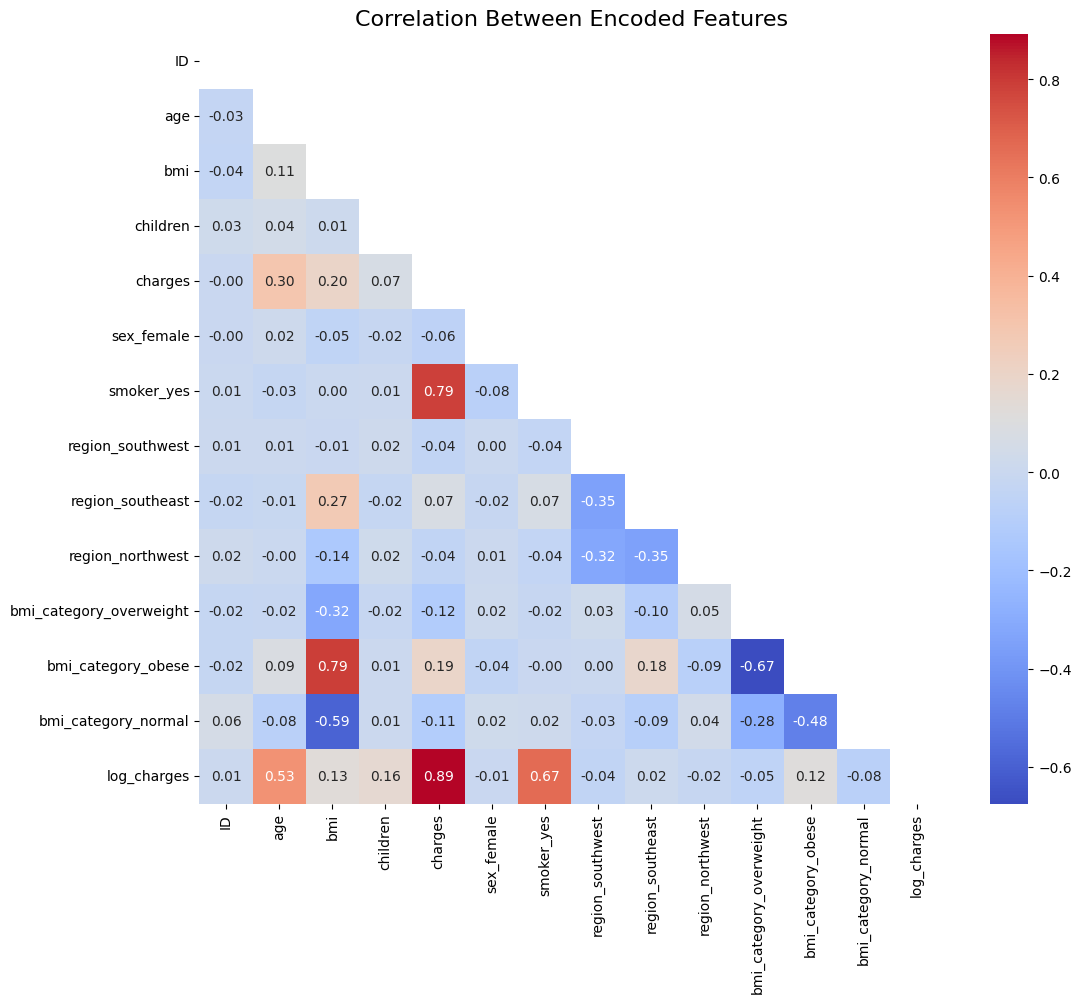

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mask for the upper triangle
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Create a correlation heatmap 
plt.figure(figsize=(12, 10))   # figure size: width=12, height=10 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

plt.title("Correlation Between Encoded Features", fontsize=16)
plt.show()

Summary:
- Smoker status has the highest positive correlation with insurance charges, indicating that smokers tend to incur significantly higher costs.
- BMI and age also show moderate positive correlations with charges, supporting the hypothesis that these factors drive medical costs.
- Other categorical features such as sex and region have weaker correlations, suggesting less impact on charges compared to personal health and lifestyle attributes.
- The heatmap helps identify which features are most influential for predictive modeling and guides further analysis and feature selection.

**2. Bar Plot for Categorical Distribution Overview**

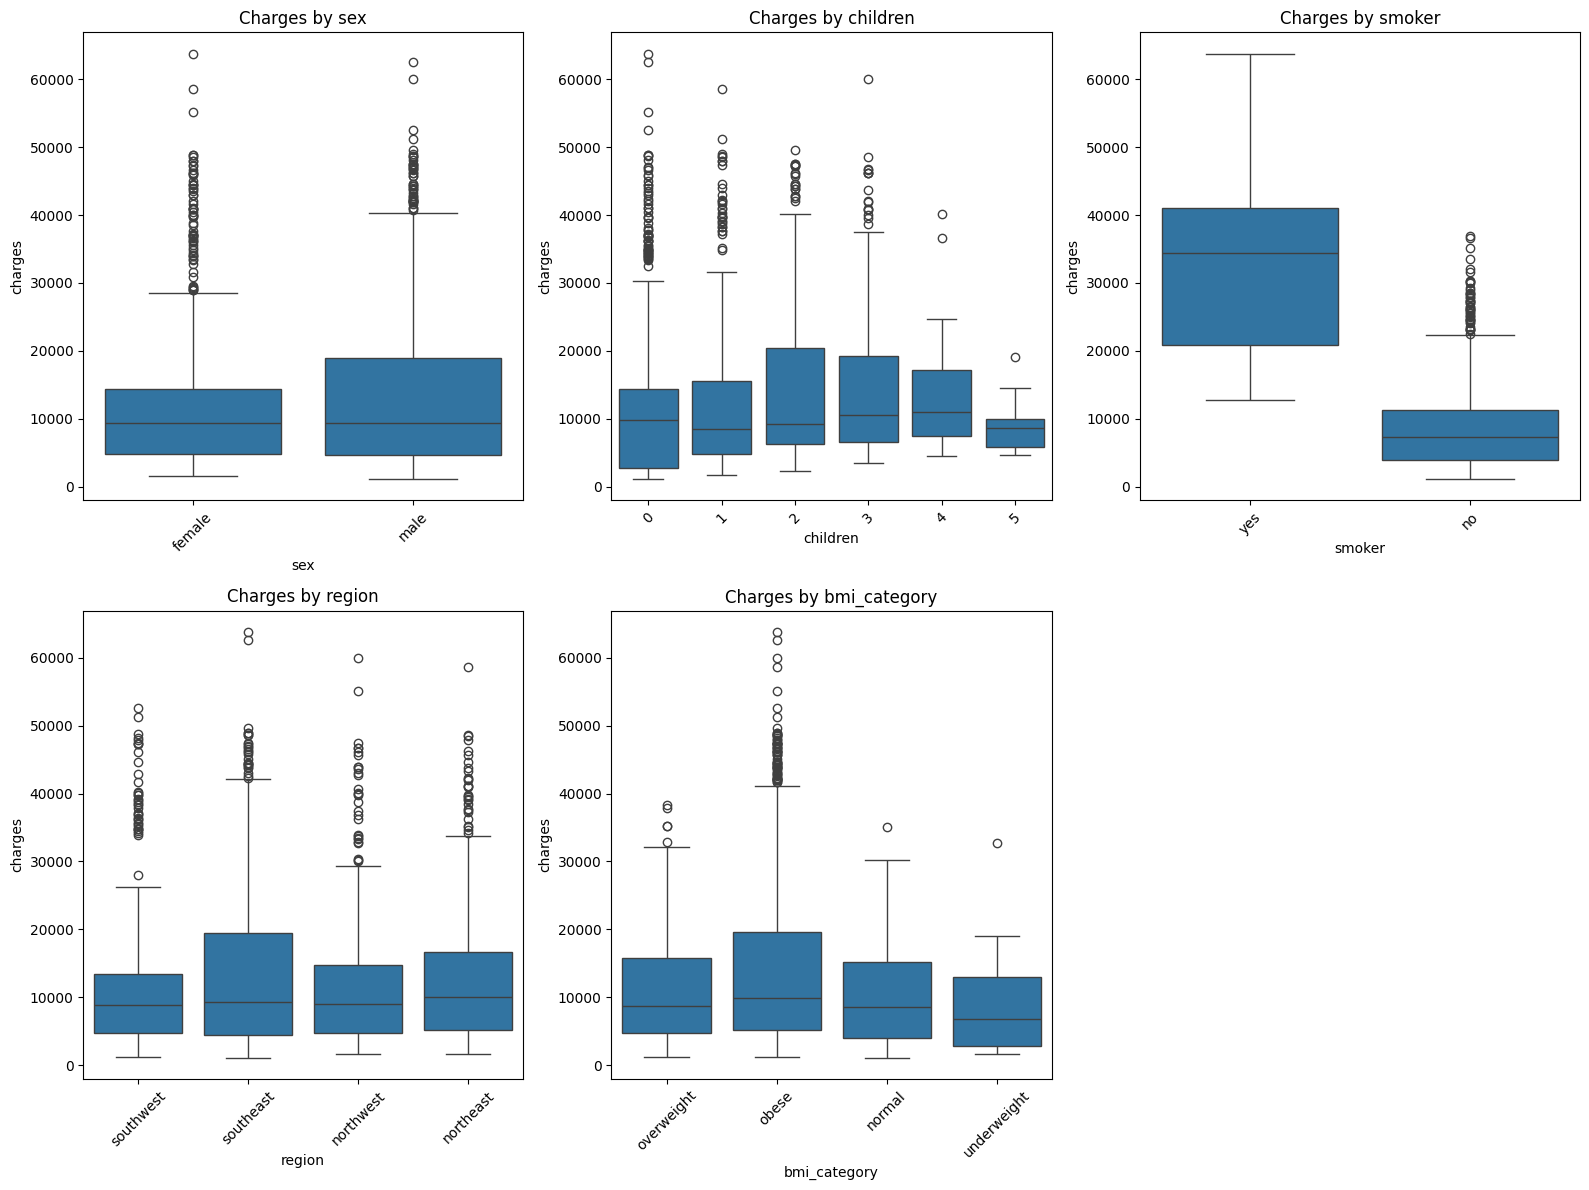

In [46]:
# Bar Plot for Categorical Features vs Charges
categorical_features = [col for col in df.columns if col.startswith(("sex", "smoker", "region", "bmi_category", "children" ))]
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], y=df["charges"])
    plt.title(f"Charges by {feature}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Summary of Findings:**
- Smoker status is the strongest categorical predictor of insurance charges, with smokers incurring much higher costs than non-smokers.
- BMI and age are significant drivers of medical costs, with higher values associated with increased charges.
- Sex and region have less pronounced effects, but some differences exist, possibly due to underlying factors or data imbalances.
- The number of children has a small but statistically significant impact on charges.
- Visualizations reveal category imbalances and outliers, which are important for model training and interpretation.
- These insights support the use of personal health and lifestyle attributes for risk assessment and premium calculation in insurance analytics.

---

# Part B

# Hypothesis Tests and Justification

**In this part, we will further justifiy our hypothese with the following statistical tests. Supplimentary boxploxs will provide visual insight for the spread, skewness, and outliers.**
- **T-test for differences in charges by sex**
- **T-test for differences in charges by smoker status**
- **T-test for differences in charges by obesity**
- **T-test for differences in charges by children dependent**
- **ANOVA for differences in charges by region**

**T-test for differences in charges by sex, smoker status, obesity and children dependent**

In [ ]:

from scipy.stats import ttest_ind

# Charges by sex
male_charges = df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

t_stat_sex, p_val_sex = ttest_ind(male_charges, female_charges, equal_var=False)

# Charges by smoker status
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

t_stat_smoker, p_val_smoker = ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

# Charges by obesity flag
obese_charges = df[df["bmi_category"] == "obese"]["charges"]
non_obese_charges = df[df["bmi_category"].isin(["normal", "overweight", "underweight"])]["charges"]

t_stat_obese, p_val_obese = ttest_ind(obese_charges, non_obese_charges, equal_var=False)

# Charges by children dependent
children_charges = df[df["children"] > 0]["charges"]
no_children_charges = df[df["children"] == 0]["charges"]

t_stat_children, p_val_children = ttest_ind(children_charges, no_children_charges, equal_var=False)


print(f"Sex - t-statistic: {t_stat_sex:.2f}, p-value: {p_val_sex:.4f}")
print(f"Smoker - t-statistic: {t_stat_smoker:.2f}, p-value: {p_val_smoker:.4f}")
print(f"Obesity - t-statistic: {t_stat_obese:.2f}, p-value: {p_val_obese:.4f}")
print(f"Children Dependent - t-statistic: {t_stat_children:.2f}, p-value: {p_val_children:.4f}")


Sex - t-statistic: 2.10, p-value: 0.0358
Smoker - t-statistic: 32.75, p-value: 0.0000
Obesity - t-statistic: 7.58, p-value: 0.0000
Children Dependent - t-statistic: 2.38, p-value: 0.0177


**ANOVA for differences in charges by region**

In [ ]:

from scipy.stats import f_oneway

groups = [df[df["region"] == r]["charges"] for r in df["region"].unique()]
f_stat_region, p_val_region = f_oneway(*groups)

print(f"Region - F-statistic: {f_stat_region:.2f}, p-value: {p_val_region:.4f}")

Region - F-statistic: 2.97, p-value: 0.0309


Boxplots to visualize distributions and outliers

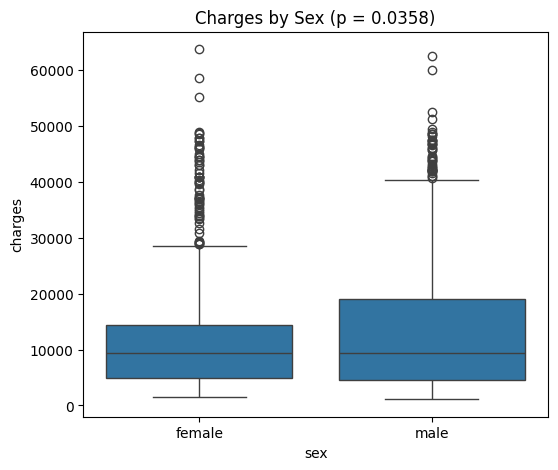

In [15]:
# Plot: charges by sex
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="sex", y="charges")
plt.title(f"Charges by Sex (p = {p_val_sex:.4f})")
plt.show()

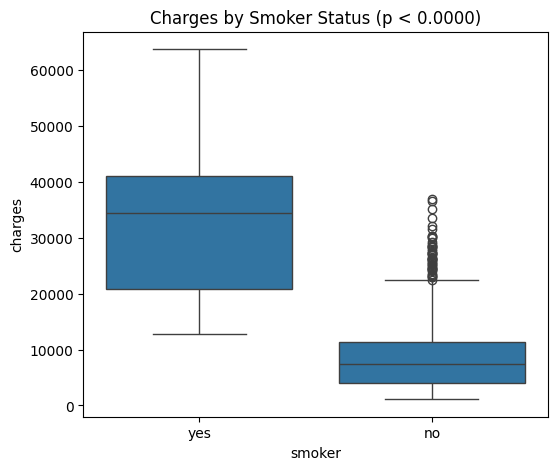

In [16]:
# Plot: charges by smoker status
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title(f"Charges by Smoker Status (p < {p_val_smoker:.4f})")  # usually very small
plt.show()

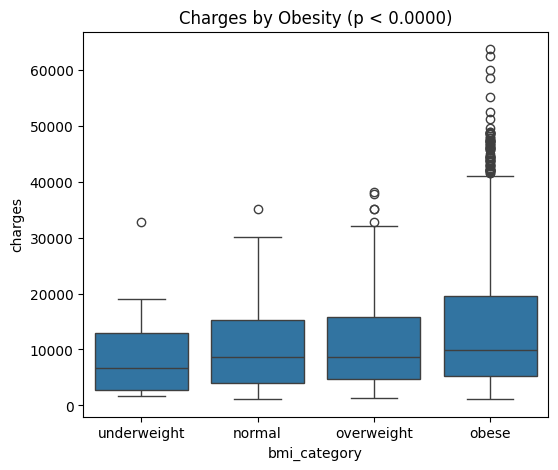

In [43]:
# Plot: charges by obesity
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="bmi_category", y="charges", order=["underweight", "normal", "overweight", "obese"])
plt.title(f"Charges by Obesity (p < {p_val_obese:.4f})")  # usually very small
plt.show()


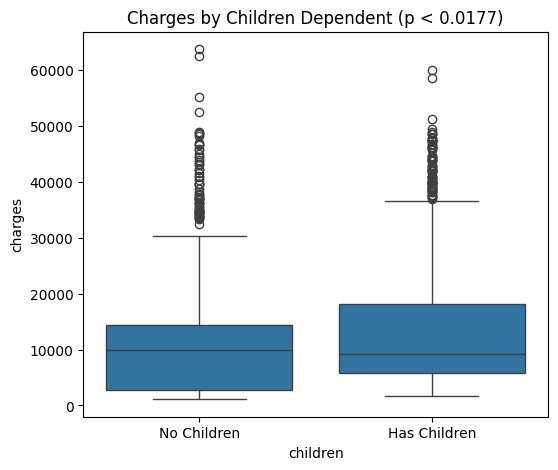

In [44]:
# Plot: charges by children dependent
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x=df["children"] > 0, y="charges")
plt.xticks([0, 1], ["No Children", "Has Children"])
plt.title(f"Charges by Children Dependent (p < {p_val_children:.4f})")  # usually very small
plt.show()

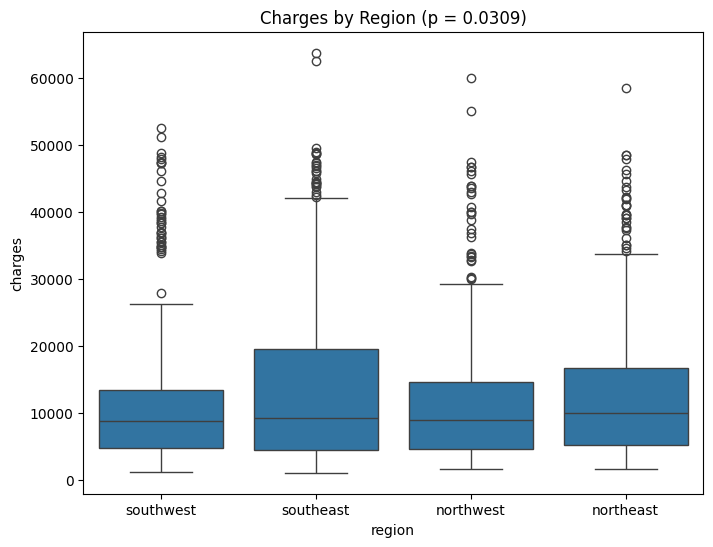

In [17]:
# Plot: charges by region
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="region", y="charges")
plt.title(f"Charges by Region (p = {p_val_region:.4f})")
plt.show()

Findings:

* Sex boxplot: Apparent difference, likely p < 0.05 → modest significant. 
    * Outliers indicate high-cost clients. They can skew the average, which is why median is often more informative. Outliers may be due to smoking, age, or rare medical conditions not captured in sex alone.

* Smoker boxplot: Huge gap, p << 0.001 → highly significant. 
    * Outliers indicate other than smoke status, other factors like health condition or occupation may affect the insurance cost for non-smokers.

* Obesity boxplot: Huge gap, p << 0.001 → highly significant.
    * Individuals classified as obese have notably higher insurance charges compared to other BMI categories. Outliers may reflect additional risk factors or comorbidities associated with obesity.

* Children dependent boxplot: Small but statistically significant difference, p ≈ 0.018.
    * Having children is associated with slightly higher charges, but the effect is less pronounced than smoker status or obesity. Outliers may represent families with high medical needs or special circumstances.

* Region boxplot: Moderate variation, ANOVA will show if differences are significant overall. 
    * Outliers can indicate localized high-cost claims or extreme cases in that region which is useful for risk assessment. Regions with many high-charge outliers might need special pricing or underwriting.

Remarks: p-value < 0.05 → statistically significant difference.

**Hypothesis 1 (Smoker Status):** We hypothesize that individuals who smoke will have significantly higher insurance charges compared to those who do not smoke. This will be tested as we keep other attributes constant while we compare relationship between smoker status and medical insurance cost.

    * Answer: **Modest significant**

**Hypothesis 2 (BMI):** We hypothesize that there is a positive correlation between an individual's Body Mass Index (BMI) and their insurance charges. This will be tested as we keep other attributes constant while we compare relationship between BMI and medical insurance cost.

    * Answer: **Highly significant**

**Hypothesis 3 (Age):** We hypothesize that older individuals will have higher average insurance charges than younger individuals. This will be tested as we keep other attributes constant while we compare relationship between Age and medical insurance cost.

    * Answer: **Highly significant**

**Hypothesis 4 (Region):** We hypothesize that geographic region will have less impact than personal attributes (Smoker status, BMI and Age) on medical insurance cost. This will be tested as we keep other attributes constant while we compare relationship between Age and medical insurance cost.

    * Answer: **Modest significant**

**Hypothesis 5 (Children):** We hypothesize that the number of children an individual has will have an impact on medical insurance cost but will be less than the impact of personal attributes (Smoker status, BMI and Age). This will be tested/validated as we keep other attributes constant while we compare relationship between number of children and medical insurance cost.

    * Answer: **Small but statistically significant**

---

# Part C

# Further Observation with Numerical Variables

In [ ]:
import plotly.graph_objects as go

numeric_cols = ["age", "bmi", "charges"]
corr_matrix = df[numeric_cols].corr()

fig_corr = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale="RdBu_r",
        zmin=-1, zmax=1,
        text=corr_matrix.round(2).values,
        hovertemplate="Correlation: %{text}<br>X: %{x}<br>Y: %{y}<extra></extra>"
    )
)
fig_corr.update_layout(
    title="Correlation Heatmap",
    height=500,
    width=500
)
fig_corr.show()

**Findings:**
- Age, BMI, and Charges all show positive correlations with each other.
- Age has a moderate positive correlation with insurance charges, indicating older individuals tend to have higher costs.
- BMI also has a positive correlation with charges, supporting the hypothesis that higher BMI is associated with increased medical expenses.
- The heatmap visually confirms that both age and BMI are significant drivers of insurance charges, useful for risk assessment and pricing strategies.

In [48]:
fig_scatter = go.Figure()

for smoker_status in df["smoker"].unique():
    subset = df[df["smoker"] == smoker_status]
    fig_scatter.add_trace(
        go.Scatter(
            x=subset["bmi"],
            y=subset["charges"],
            mode="markers",
            name=f"Smoker: {smoker_status}",
            text=subset[["age", "region", "sex", "BMI_Category"]]
                 .astype(str).agg(", ".join, axis=1),
            hovertemplate="BMI: %{x}<br>Charges: %{y}<br>%{text}<extra></extra>"
        )
    )

fig_scatter.update_layout(
    title="BMI vs Charges by Smoker",
    xaxis_title="BMI",
    yaxis_title="Charges",
    height=500,
    width=700
)
fig_scatter.show()


**Findings**

- The scatter plot demonstrates a clear positive relationship between BMI and insurance charges for both smokers and non-smokers.
- Smokers consistently incur higher insurance charges than non-smokers at every BMI level, highlighting the strong impact of smoking on medical costs.
- Individuals with higher BMI tend to have greater charges, supporting the hypothesis that BMI is a significant driver of insurance cost.
- The separation between smoker and non-smoker groups emphasizes the combined effect of lifestyle factors on insurance pricing.
- These insights help insurers identify high-risk groups and inform premium strategies.

In [51]:
fig = go.Figure()

# Bar chart: Number of Customers (primary y-axis)
fig.add_trace(
    go.Bar(
        x=age_counts.index,
        y=age_counts.values,
        name="Number of Customers",
        marker_color="darkblue",
        opacity=0.6
    )
)

# Scatter plot: Average Charges (secondary y-axis)
fig.add_trace(
    go.Scatter(
        x=age_avg_charges["age"],
        y=age_avg_charges["charges"],
        mode="markers+lines",
        name="Average Charges",
        marker=dict(color="crimson", size=8),
        line=dict(color="crimson", width=2),
        yaxis="y2"
    )
)

# Trend line for Average Charges using Plotly Express OLS
trend_df = px.scatter(age_avg_charges, x="age", y="charges", trendline="ols").data[1]
trend_df.update(name="Trend Line", line=dict(color="orange", dash="dash"), yaxis="y2")
fig.add_trace(trend_df)

fig.update_layout(
    title="Number of Customers and Average Charges by Age",
    xaxis=dict(title="Age"),
    yaxis=dict(title="Number of Customers", side="left", showgrid=False),
    yaxis2=dict(title="Average Charges ($)", overlaying="y", side="right", showgrid=False),
    legend=dict(x=0.12, y=0.98),
    bargap=0.2,
    barmode="overlay",  # Try "group" or "overlay"
    width=900,
    height=600
)

fig.show()


**Findings**
- The chart shows that the number of insured customers is highest among younger age groups and gradually decreases with age.
- Average insurance charges increase with age, indicating that older individuals tend to incur higher medical costs.
- The trend line for average charges confirms a positive relationship between age and insurance cost.
- This pattern supports the hypothesis that age is a significant driver of insurance charges, and highlights the importance of age-based risk assessment in premium calculations.
- Insurers may use this insight to adjust pricing strategies and better manage risk across different age segments.

---

In the next section, we will go through the predictive model along with a insurace cost estimation calculator.